In [1]:
#Importing needed library
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn import metrics


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


In [2]:
loan_train='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv'

In [3]:
df=pd.read_csv(loan_train)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

In [6]:
#Convert to date time object
df['effective_date']=pd.to_datetime(df['effective_date'])
df['due_date ']=pd.to_datetime(df['due_date'])

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

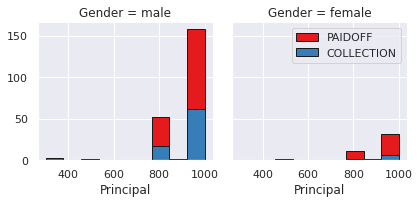

In [8]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

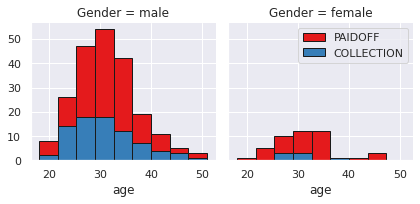

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

In [10]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,due_date
0,0,0,PAIDOFF,1000,30,2016-09-08,10/7/2016,45,High School or Below,0,2016-10-07
1,2,2,PAIDOFF,1000,30,2016-09-08,10/7/2016,33,Bechalor,1,2016-10-07
2,3,3,PAIDOFF,1000,15,2016-09-08,9/22/2016,27,college,0,2016-09-22
3,4,4,PAIDOFF,1000,30,2016-09-09,10/8/2016,28,college,1,2016-10-08
4,6,6,PAIDOFF,1000,30,2016-09-09,10/8/2016,29,college,0,2016-10-08


In [12]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

In [13]:
#df['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)

In [14]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


In [15]:
 Feature = df[['Principal','terms','age','Gender']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [16]:
#Independent Variable
X=Feature
X[0:5]

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,45,0,0,1,0
1,1000,30,33,1,1,0,0
2,1000,15,27,0,0,0,1
3,1000,30,28,1,0,0,1
4,1000,30,29,0,0,0,1


In [17]:
#Target variable
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

In [18]:
#Normalize the data
X=preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -0.38170062,
         1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177,  2.61985426,
        -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177, -0.38170062,
        -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004, -0.38170062,
        -0.87997669,  1.14984679]])

# K Nearest Neighbor(KNN)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y ,train_size=0.7 ,random_state=4)

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [22]:
k=12
knn= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

In [23]:
pred=knn.predict(X_test)

In [24]:
metrics.accuracy_score(y_test,pred)

0.75

In [25]:
#find the k
k=range(1,40)
error_test=[]
error_train=[]
for i in k:
    knn= KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    pred=knn.predict(X_test)
    error_test.append(np.mean(pred!=y_test))
    pred1=knn.predict(X_train)
    error_train.append(np.mean(pred1!=y_train))
    
    
    

Text(0, 0.5, 'Error')

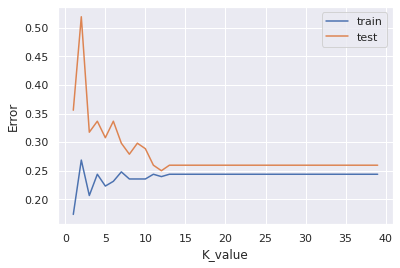

In [26]:
plt.plot(k,error_train,label='train')
plt.plot(k,error_test,label='test')
plt.legend()
plt.xlabel("K_value")
plt.ylabel("Error")

##### from above graph we can see that after k=10,there is very less variation
##### So,Lets pick the K=12

In [27]:
k=12
knn= KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)

# Decision Tree


In [28]:
from sklearn.tree import DecisionTreeClassifier
Tree= DecisionTreeClassifier()
Tree.fit(X,y)

DecisionTreeClassifier()

# Support Vector Machine

In [29]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X,y)

SVC()

# Logistic Regression

In [30]:
#sklearn.linear_model.LogisticRegression
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X,y)

LogisticRegression()

# Model Evaluation using Test set


In [31]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [32]:
loan_test='https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv'

In [33]:
df_test=pd.read_csv(loan_test)

In [34]:
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [35]:
df_test.shape

(54, 10)

In [36]:
X_test=df_test[['Principal','terms','age','Gender']]
X_test = pd.concat([X_test,pd.get_dummies(df_test['education'])], axis=1)
X_test.drop(['Master or Above'], axis = 1,inplace=True)
X_test.head()

,Principal,terms,age,Gender,Bechalor,High School or Below,college
0,1000,30,50,female,1,0,0
1,300,7,35,male,0,0,0
2,1000,30,43,female,0,1,0
3,1000,30,26,male,0,0,1
4,800,15,29,male,1,0,0


In [37]:
X_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)

In [38]:
#df_test['loan_status'].replace(to_replace=['PAIDOFF','COLLECTION'], value=[1,0],inplace=True)

In [39]:
X_test1=preprocessing.StandardScaler().fit(X_test).transform(X_test)

In [40]:
X_test1.shape

(54, 7)

In [41]:
y_test1=df_test['loan_status']
y_test1[0:5]

0    PAIDOFF
1    PAIDOFF
2    PAIDOFF
3    PAIDOFF
4    PAIDOFF
Name: loan_status, dtype: object

In [42]:
y_test1.shape

(54,)

### KNN

In [43]:
#f1_score of KNN
knn_f1score=f1_score(knn.predict(X_test1),y_test1, average='weighted')
knn_f1score

0.851063829787234

In [44]:
#jaccard_score of KNN
knn_jacScore=jaccard_score(knn.predict(X_test1),y_test1 ,pos_label='PAIDOFF')
knn_jacScore

0.7407407407407407

### Decision Tree


In [45]:
#f1_score of Decison Tree
dt_f1Score=f1_score(Tree.predict(X_test1),y_test1, average='weighted')
dt_f1Score

0.7101449275362318

In [46]:
#jaccard_score of Decision Tree
dt_jacScore=jaccard_score(Tree.predict(X_test1),y_test1 ,pos_label='PAIDOFF')
dt_jacScore

0.6666666666666666

### Suport Vector Machine

In [47]:
svm_f1Score=f1_score(clf.predict(X_test1),y_test1, average='weighted')
svm_f1Score

0.851063829787234

In [48]:
svm_jacScore=jaccard_score(clf.predict(X_test1),y_test1 ,pos_label='PAIDOFF')
svm_jacScore

0.7407407407407407

### Logistic Regression

In [49]:
lr_f1Score=f1_score(LR.predict(X_test1),y_test1, average='weighted')
lr_f1Score

0.851063829787234

In [51]:
lr_jacScore=jaccard_score(LR.predict(X_test1),y_test1 ,pos_label='PAIDOFF')
lr_jacScore

0.7407407407407407

In [55]:
#probabilty prediction
z=LR.predict_proba(X_test1)

In [56]:
lr_loggLoss=metrics.log_loss(LR.predict(X_test1),z ,labels=['PAIDOFF','COLLECTIONS'])
lr_loggLoss

0.2868532692032837

In [65]:
Algorithm=['KNN','Decision Tree','SVM','LogisticRegression']
Jaccard=[knn_jacScore,dt_jacScore,svm_jacScore,lr_jacScore]
F1_score=[knn_f1score,dt_f1Score,svm_f1Score,lr_f1Score]
LogLoss=['NA','NA','NA',lr_loggLoss]

In [69]:
predicted_score=pd.DataFrame({'Algorithm':Algorithm,'Jaccard':Jaccard,'F1_score':F1_score,'LogLoss':LogLoss})

In [70]:
predicted_score

,Algorithm,Jaccard,F1_score,LogLoss
0,KNN,0.740741,0.851064,NA
1,Decision Tree,0.666667,0.710145,NA
2,SVM,0.740741,0.851064,NA
3,LogisticRegression,0.740741,0.851064,0.286853


##### Finally